<a href="https://colab.research.google.com/github/lightweightcobra/Machine-Learning/blob/main/ADITYA_KUMAR_CS_IT308_LAB_6_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2023-24 </center>
## <center> CS/IT 308, CS 652, CS8XX Machine Learning Lab </center>
## <center> Lab#6 Basic optimization techniques </center>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from scipy.io import wavfile
from numpy import linalg as la
import matplotlib.image as mpimg
import glob
from numpy import linalg as LA
import scipy.io as sio


##  **Problem 1)**
Find minima of following functions using gradient descent method with learning rate 0.01 and 0.1 along with different number of iterations. Try choosing a large value of learning rate and test the convergence. Plot the functions, highlight corresponding minima, and show convergence/divergence on the plot.

(a) $L_1(θ) = θ^2$

(b) $L_2(θ) = θ_1^2 + θ_2^2$

(c) $L_3(θ) = (θ - 1)^2$

(d) $L_4(θ) = 2 (θ_1-1)^2 + 2(θ_2-1)^2$


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy
import math



def convergence(alpha):
    # Set the initial values for theta, p and the convergence criteria e

    def L1(X):
      return np.square(X)

    def L1_grad(X):
      return 2*X

    theta = 10
    p = 20
    e = 1e-6

    # Define the range of x values and calculate the corresponding y values
    x = np.linspace(-10, 10, 1000)
    y = L1(x)

    # Calculate the coordinates of the starting point and plot it
    plt.plot(x, y, label='L(theta) = theta^2', color='blue')

    x0, y0 = (theta, L1(theta))
    plt.scatter(x0, y0, label='Starting point', color='black')

    # Initialize the counter and the lists to store the theta values and iteration counts
    count = 0
    theta_values = []

    # Loop until convergence criteria is met
    while np.abs(theta - p) > e:
        # Store the current value of theta in the list
        theta_values.append(theta)
        # Calculate the new value of theta using the update rule and the derivative function
        theta_new = theta - alpha * L1_grad(theta)
        # Increment the counter and store the iteration count
        count += 1
        # Update the value of p
        p = theta
        theta = theta_new

    # Calculate the final y values for the converged thetas
    theta_values = np.array(theta_values)
    converged_ys = L1(theta_values)

    # Plot the convergence path
    plt.scatter(theta_values, converged_ys, label='Converged Path', color='green')
    # Plot the final converged point in red
    plt.scatter(theta_values[-1], converged_ys[-1], label='Converged Point', color='red')

    # Print the final converged value of theta and the iteration count
    print(f"Final value of theta: {theta}")
    print(f"Iteration count: {count}")

Final value of theta: 3.213876088517982e-06
Iteration count: 67


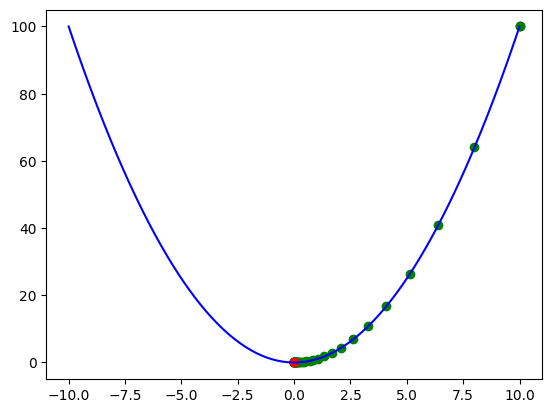

In [ ]:
convergence(0.1)

Final value of theta: 4.819498724305525e-05
Iteration count: 606


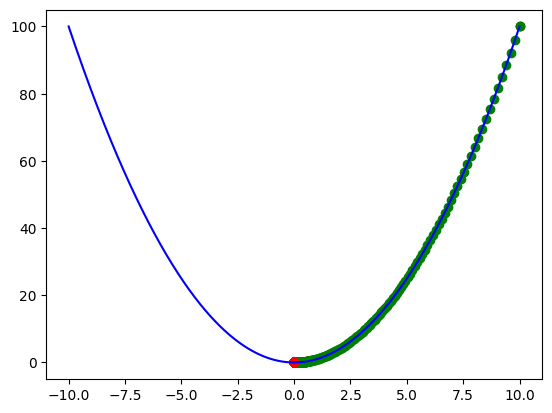

In [ ]:
convergence(0.01)

Q1 (b)


In [ ]:
def convergence2(alpha):

  def L_sum(X):
      return np.sum(X ** 2, axis=0)

  def L2(X):
    return np.sum(X ** 2)

  def L2_grad(X):
    return np.array([2 *X[0], 2*X[1]])

  theta = np.array([10, 10])
  e = 0.001
  p = 2 * theta

  x1 = np.linspace(-10, 10, 100)
  x2 = np.linspace(-10, 10, 100)
  x1, x2 = np.meshgrid(x1, x2)
  x = np.vstack((x1.flatten(), x2.flatten()))
  y = L_sum(x)
  y = y.reshape(x1.shape)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, y, cmap='viridis')

  x0, y0 = (theta, L2(theta))
  ax.scatter(x0[0], x0[1], y0, label='Starting point', color='blue', s=100)

  count = 0
  theta_values = []

    # Loop until convergence criteria is met
  while np.linalg.norm(p - theta) > e:
        # Store the current value of theta in the list
    theta_values.append(theta)
        # Calculate the new value of theta using the update rule and the derivative function
    theta_new = theta - alpha * L2_grad(theta)
        # Increment the counter and store the iteration count
    count += 1
        # Update the value of p
    p = theta
    theta = theta_new

  theta_values = np.array(theta_values)
  converged_ys = L_sum(np.vstack((theta_values[:, 0], theta_values[:, 1])))

  ax.scatter(theta_values[:, 0], theta_values[:, 1], converged_ys, label='Converged Path', color='purple')

    # Plot the final converged point in red
  ax.scatter(theta_values[-1][0], theta_values[-1][1], converged_ys[-1], label='Converged Point', color='red', s=100)

  ax.view_init(elev=-10)
  print(f"Final value of theta: {theta}")
  print(f"Iteration count: {count}")

  plt.show()
  pass


Final value of theta: [0.00259615 0.00259615]
Iteration count: 37


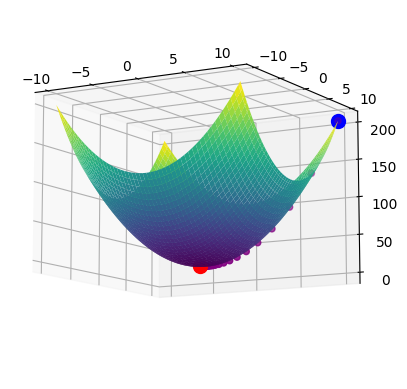

In [ ]:
convergence2(0.1)

Final value of theta: [0.03423949 0.03423949]
Iteration count: 281


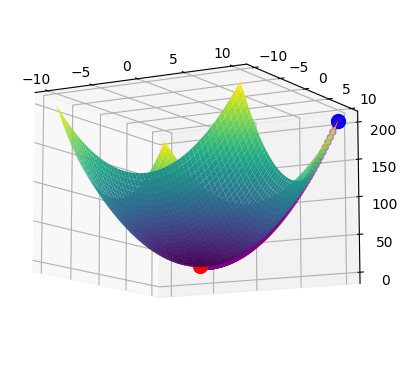

In [ ]:
convergence2(0.01)

Q1 (c)

In [ ]:
def convergence3(alpha):

    def L1(X):
      return np.square(X-1)

    def L1_grad(X):
      return 2*(X-1)

    theta = 10
    p = 20
    e = 1e-6

    # Define the range of x values and calculate the corresponding y values
    x = np.linspace(-10, 10, 1000)
    y = L1(x)

    # Calculate the coordinates of the starting point and plot it
    plt.plot(x, y, label='L(theta) = theta^2', color='blue')

    x0, y0 = (theta, L1(theta))
    plt.scatter(x0, y0, label='Starting point', color='black')

    # Initialize the counter and the lists to store the theta values and iteration counts
    count = 0
    theta_values = []

    # Loop until convergence criteria is met
    while np.abs(theta - p) > e:
        # Store the current value of theta in the list
        theta_values.append(theta)
        # Calculate the new value of theta using the update rule and the derivative function
        theta_new = theta - alpha * L1_grad(theta)
        # Increment the counter and store the iteration count
        count += 1
        # Update the value of p
        p = theta
        theta = theta_new

    # Calculate the final y values for the converged thetas
    theta_values = np.array(theta_values)
    converged_ys = L1(theta_values)

    # Plot the convergence path
    plt.scatter(theta_values, converged_ys, label='Converged Path', color='green')
    # Plot the final converged point in red
    plt.scatter(theta_values[-1], converged_ys[-1], label='Converged Point', color='red')

    # Print the final converged value of theta and the iteration count
    print(f"Final value of theta: {theta}")
    print(f"Iteration count: {count}")

Final value of theta: 1.0000036156105996
Iteration count: 66


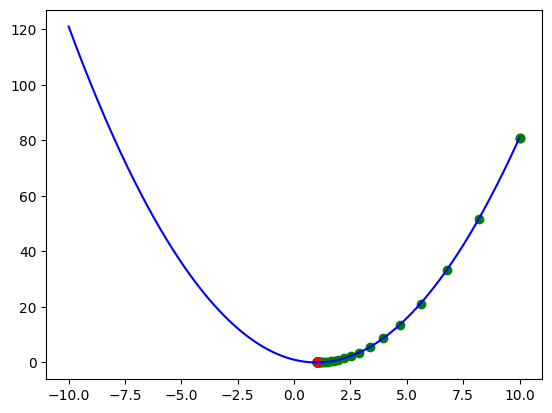

In [ ]:
convergence3(0.1)

Final value of theta: 1.000048965244219
Iteration count: 600


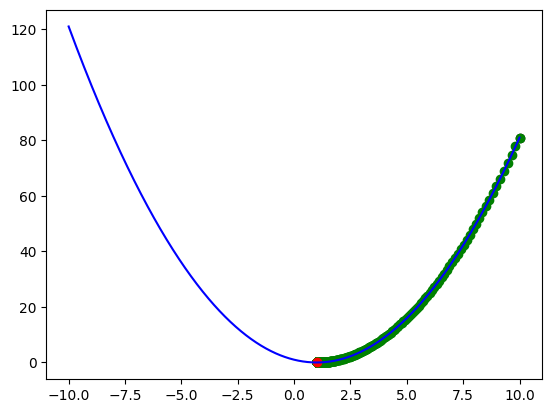

In [ ]:
convergence3(0.01)

Q1 (d)

In [ ]:
def convergence4(alpha):
  def L_sum(X):
      return np.sum(2*(X-1)** 2, axis=0)

  def L2(X):
    return 2*np.sum((X-1) ** 2)

  def L2_grad(X):
    return np.array([4 *(X[0]-1), 4*(X[1]-1)])

  theta = np.array([10, 10])
  e = 0.001
  p = 2 * theta

  x1 = np.linspace(-10, 10, 100)
  x2 = np.linspace(-10, 10, 100)
  x1, x2 = np.meshgrid(x1, x2)
  x = np.vstack((x1.flatten(), x2.flatten()))
  y = L_sum(x)
  y = y.reshape(x1.shape)

  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.plot_surface(x1, x2, y, cmap='viridis')

  x0, y0 = (theta, L2(theta))
  ax.scatter(x0[0], x0[1], y0, label='Starting point', color='blue', s=100)

  count = 0
  theta_values = []

    # Loop until convergence criteria is met
  while np.linalg.norm(p - theta) > e:
        # Store the current value of theta in the list
    theta_values.append(theta)
        # Calculate the new value of theta using the update rule and the derivative function
    theta_new = theta - alpha * L2_grad(theta)
        # Increment the counter and store the iteration count
    count += 1
        # Update the value of p
    p = theta
    theta = theta_new

  theta_values = np.array(theta_values)
  converged_ys = L_sum(np.vstack((theta_values[:, 0], theta_values[:, 1])))

  ax.scatter(theta_values[:, 0], theta_values[:, 1], converged_ys, label='Converged Path', color='purple')

    # Plot the final converged point in red
  ax.scatter(theta_values[-1][0], theta_values[-1][1], converged_ys[-1], label='Converged Point', color='red', s=100)

  ax.view_init(elev=-10)
  print(f"Final value of theta: {theta}")
  print(f"Iteration count: {count}")

  plt.show()


Final value of theta: [1.00091404 1.00091404]
Iteration count: 18


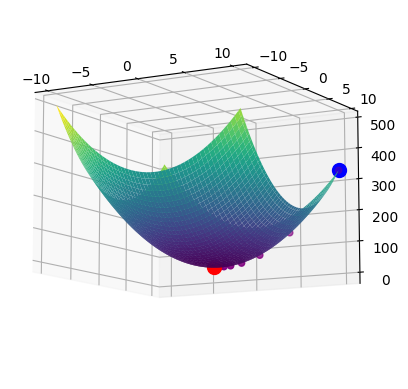

In [ ]:
convergence4(0.1)

Final value of theta: [1.01674991 1.01674991]
Iteration count: 154


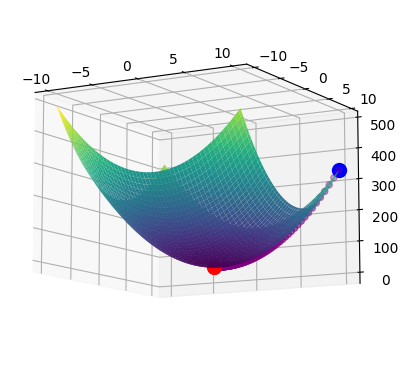

In [ ]:
convergence4(0.01)

##  **Problem 2)**
Apply stochastic gradient algorithm on the given dataset and estimate $\theta_0$, $\theta_1$ and final cost value. Step by step hints have been given for the same.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.style.use(['ggplot'])

1) Dataset:

In [ ]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

2) Visualize the data.

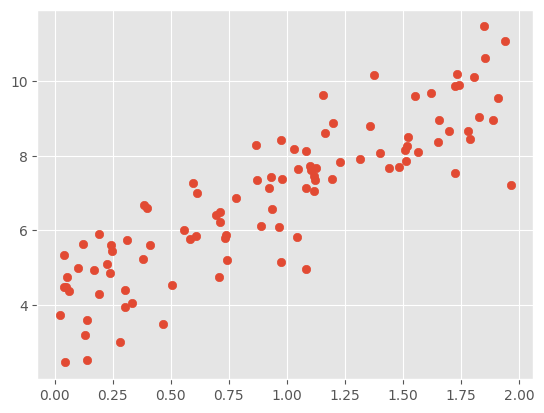

In [ ]:
#Write code here
plt.scatter(X, y)
plt.show()

3) We will write the line equation $y=m \space x+c$ in machine learning form as $J(\theta)=\theta_1 X + \theta_0$. Now choose one random sample $X_b$ (you can concatenate ones and $X$) and find $\theta_{best} = (X_b^T X_b)^{-1}X_b^Ty$.

In [ ]:
Xb = np.column_stack((np.ones_like(X), X))
theta_best = la.pinv(Xb)@y
print(theta_best)

[[4.07911435]
 [2.99012507]]


4) For example choose $X_{new}=\begin{bmatrix}
0 \\
2
\end{bmatrix}$. Obtain $X_{new_b}$ by concatinating ones and $X_{new}$. Finally find $y_{predict}=X_{new_b}\theta_{best}$.

In [ ]:
X_new = np.array([0,2])
X_new_b = np.column_stack((np.ones_like(X_new), X_new))
y_predict = X_new_b@theta_best
print(y_predict)

[[ 4.07911435]
 [10.05936448]]


5) Visualize $X_{new}$ and $y_{predict}$.

(100, 1)


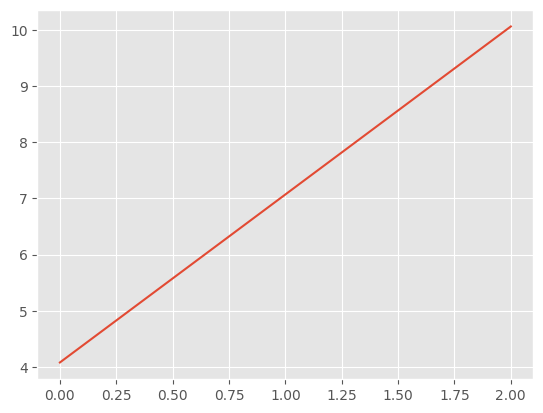

In [ ]:
#Write code here.
plt.plot(X_new, y_predict)
print(X.shape)

6) Define the cost function.

In [ ]:
def  cal_cost(theta,X,y):
  # cost = np.sum((y - X@theta)**2)/X.shape([0])
  cost = 1 / X.shape[0] * np.sum((X @ theta - y) ** 2)
  return cost


7) Define the gradient descent function.

In [ ]:
def gradient_descent(X,y,theta,learning_rate=0.01,iterations=1):
    m, n = X.shape

    cost_history = [cal_cost(theta, X, y)]
    theta_history = [theta]

    for _ in range(iterations):
      y_predict = X @ theta
      error = X.T @ (y_predict - y)

      theta = theta - learning_rate / (m) * error

      theta_history.append(theta)
      cost_history.append(cal_cost(theta, X, y))

    return theta, cost_history, theta_history

8) Using learning rate $0.01$ and $1000$ iterations find $\theta_0$, $\theta_1$ and final cost.

In [ ]:
lr =0.01
n_iter = 1000

theta = np.zeros((2, 1))
X_new = np.column_stack((np.ones_like(X), X))

theta, cost_history, theta_history = gradient_descent(X_new, y, theta, lr, n_iter)

print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0],theta[1][0]))
print('Final cost/MSE:  {:0.3f}'.format(cost_history[-1]))

Theta0:          3.932,
Theta1:          3.122
Final cost/MSE:  0.962


9) Plot $J(\theta)$ and iterations.

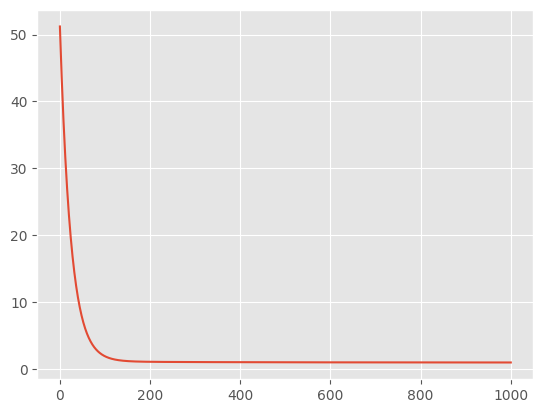

In [ ]:
#Write code here
plt.plot(np.arange(n_iter + 1), cost_history)


10) You can also observe the changes in cost function.

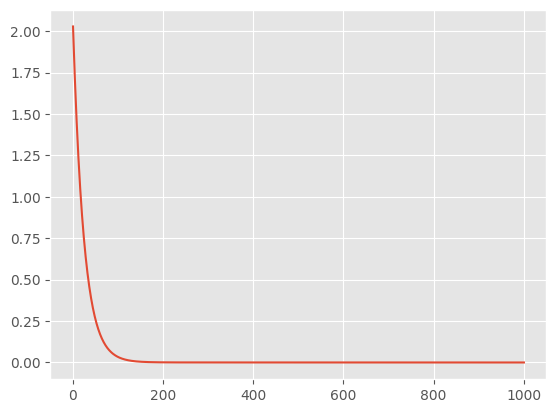

In [ ]:
#Write code here.
plt.plot(np.arange(1, n_iter + 1), np.abs(np.diff(cost_history)))

##  **Problem 3)**
Find minimum of the function $L(θ)$ = using stochastic gradient descent method (take the data from the excel sheet given). Choose different learning rates and number of iterations.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statistics as st
import sympy as sy
from google.colab import files

In [ ]:
# Read data from CSV
data = pd.read_csv('/content/data - data.csv')
X = data['x'].values.reshape(-1, 1)
y = data['y'].values.reshape(-1, 1)

# Feature Scaling
X_mean = np.mean(X)
X_std = np.std(X)
X_scaled = (X - X_mean) / X_std

# Prepare data
X_b = np.column_stack((np.ones_like(X_scaled), X_scaled))

# Define the cost function
def cal_cost(theta, X, y):
    m = len(y)
    h = X@theta
    cost = (1 / m) * np.sum(np.square(h - y))
    return cost

# Define stochastic gradient descent function
def stochastic_gradient_descent(X, y, theta, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    cost_history = []
    theta_history = [theta.copy()]

    for _ in range(iterations):
        rand_index = np.random.randint(0, m)
        X_i = X[rand_index, :].reshape(1, -1)
        y_i = y[rand_index].reshape(1, -1)
        h = X_i@(theta)
        error = X_i.T@(h - y_i)
        theta = theta - learning_rate * error
        theta_history.append(theta.copy())
        cost = cal_cost(theta, X, y)
        cost_history.append(cost)

    return theta, cost_history, theta_history

# Choose learning rates
learning_rates = [0.0001, 0.001, 0.01]
iterations = 1000

# Run stochastic gradient descent for each learning rate
for lr in learning_rates:
    theta = np.zeros((2, 1))
    theta, cost_history, theta_history = stochastic_gradient_descent(X_b, y, theta, lr, iterations)
    print("Minimum Cost History: ", np.min(cost_history))
    print(f'Learning Rate: {lr}')
    print('Theta0:          {:0.3f},\nTheta1:          {:0.3f}'.format(theta[0][0], theta[1][0]))

plt.show()


Minimum Cost History:  514.0176000855741
Learning Rate: 0.0001
Theta0:          2.282,
Theta1:          -0.719
Minimum Cost History:  97.36035492857864
Learning Rate: 0.001
Theta0:          15.055,
Theta1:          -4.504
Minimum Cost History:  16.732171623922593
Learning Rate: 0.01
Theta0:          23.474,
Theta1:          -7.128
